# Stellar Classification

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

# Content
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
alpha = Right Ascension angle (at J2000 epoch)
delta = Declination angle (at J2000 epoch)
u = Ultraviolet filter in the photometric system
g = Green filter in the photometric system
r = Red filter in the photometric system
i = Near Infrared filter in the photometric system
z = Infrared filter in the photometric system
run_ID = Run Number used to identify the specific scan
rereun_ID = Rerun Number to specify how the image was processed
cam_col = Camera column to identify the scanline within the run
field_ID = Field number to identify each field
spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
class = object class (galaxy, star or quasar object)
redshift = redshift value based on the increase in wavelength
plate = plate ID, identifies each plate in SDSS
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('star_classification.csv')

In [3]:
 data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
data['class']=data['class'].map({'GALAXY':0,'STAR':1,'QSO':2})

In [5]:
data['run_ID'].nunique()

430

In [6]:
len(data)

100000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


In [8]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.595160,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.787509,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,0.000000,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.000000,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.000000,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,1.000000,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,2.000000,7.011245,12547.000000,58932.000000,1000.000000


<AxesSubplot:>

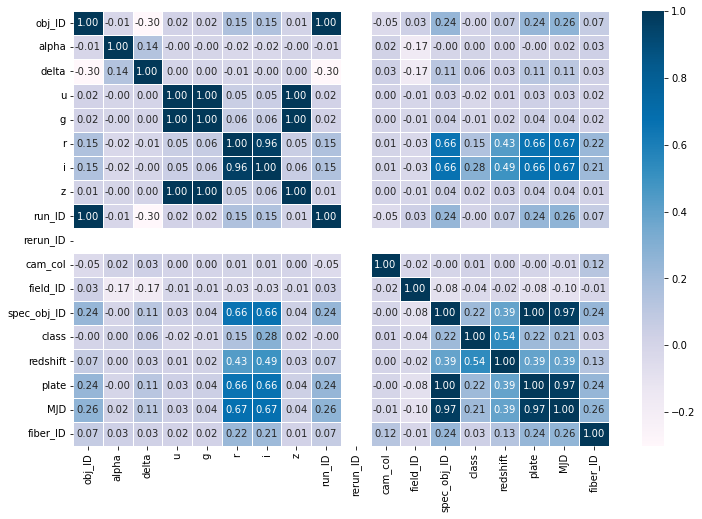

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f')


C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

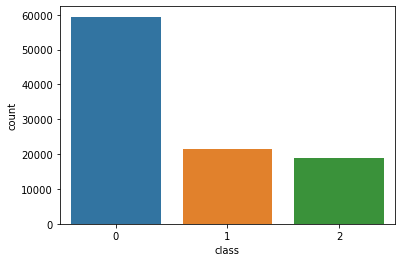

In [10]:
sns.countplot(data['class'])

<AxesSubplot:xlabel='class', ylabel='alpha'>

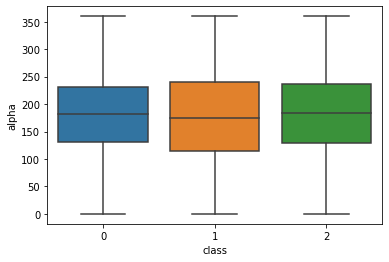

In [11]:
sns.boxplot(data=data,x='class',y='alpha')

<AxesSubplot:xlabel='class', ylabel='delta'>

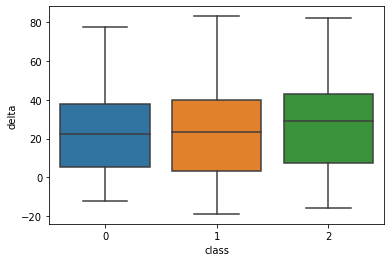

In [12]:
sns.boxplot(data=data,x='class',y='delta')

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='redshift', ylabel='Density'>

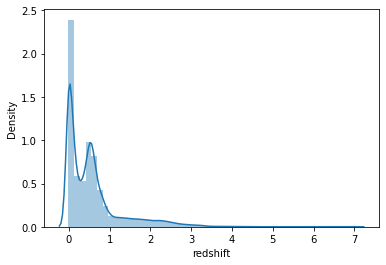

In [13]:
sns.distplot(data['redshift'])

In [14]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [15]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
x=data.drop(['class'],axis=1)

In [20]:
y=data['class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [23]:
X_train=sc.fit_transform(X_train)

In [24]:
X_test=sc.transform(X_test)

In [25]:
X_train.shape

(80000, 17)

In [26]:
import tensorflow as tf

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [28]:
model=Sequential(
[
    Dense(25,activation='relu'),
    Dense(15,activation='relu'),
    Dense(10,activation='relu'),
    Dense(3,activation='linear')
    
])

In [29]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [30]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/250
313/313 [==============================] - 3s 6ms/step - loss: 0.5684 - val_loss: 0.2718
Epoch 2/250
313/313 [==============================] - 1s 4ms/step - loss: 0.2296 - val_loss: 0.1997
Epoch 3/250
313/313 [==============================] - 1s 4ms/step - loss: 0.1832 - val_loss: 0.1743
Epoch 4/250
313/313 [==============================] - 1s 4ms/step - loss: 0.1652 - val_loss: 0.1624
Epoch 5/250
313/313 [==============================] - 1s 4ms/step - loss: 0.1540 - val_loss: 0.1536
Epoch 6/250
313/313 [==============================] - 1s 4ms/step - loss: 0.1473 - val_loss: 0.1471
Epoch 7/250
313/313 [==============================] - 1s 4ms/step - loss: 0.1410 - val_loss: 0.1422
Epoch 8/250
313/313 [==============================] - 1s 4ms/step - loss: 0.1368 - val_loss: 0.1373
Epoch 9/250
313/313 [==============================] - 1s 4ms/step - loss: 0.1331 - val_loss: 0.1349
Epoch 10/250
313/313 [==============================] - 1s 3ms/step - loss: 0.1290 - val_lo

313/313 [==============================] - 1s 3ms/step - loss: 0.0945 - val_loss: 0.0991
Epoch 82/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0942 - val_loss: 0.1027
Epoch 83/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0948 - val_loss: 0.1000
Epoch 84/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0938 - val_loss: 0.0996
Epoch 85/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0950 - val_loss: 0.1115
Epoch 86/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0948 - val_loss: 0.1025
Epoch 87/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0944 - val_loss: 0.1011
Epoch 88/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0932 - val_loss: 0.1009
Epoch 89/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0947 - val_loss: 0.1036
Epoch 90/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0936 - val_loss: 

Epoch 161/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0897 - val_loss: 0.0975
Epoch 162/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0898 - val_loss: 0.0989
Epoch 163/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0974
Epoch 164/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0893 - val_loss: 0.1006
Epoch 165/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0895 - val_loss: 0.0994
Epoch 166/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0907 - val_loss: 0.1103
Epoch 167/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0929 - val_loss: 0.1037
Epoch 168/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0896 - val_loss: 0.0996
Epoch 169/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0904 - val_loss: 0.0983
Epoch 170/250
313/313 [==============================] - 1s 3ms/step - lo

313/313 [==============================] - 1s 3ms/step - loss: 0.0883 - val_loss: 0.0968
Epoch 241/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0882 - val_loss: 0.0979
Epoch 242/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0881 - val_loss: 0.0999
Epoch 243/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0882 - val_loss: 0.0968
Epoch 244/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0880 - val_loss: 0.0995
Epoch 245/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0877 - val_loss: 0.0972
Epoch 246/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0877 - val_loss: 0.0991
Epoch 247/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0877 - val_loss: 0.1001
Epoch 248/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0879 - val_loss: 0.0978
Epoch 249/250
313/313 [==============================] - 1s 3ms/step - loss: 0.0874 - v

In [31]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

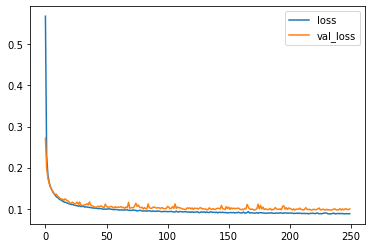

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
predictions = model.predict(X_test)

625/625 [==============================] - 1s 2ms/step


In [34]:
prediction_p = tf.nn.softmax(predictions)

In [35]:
yhat = np.argmax(prediction_p)

In [37]:
y_hat=tf.argmax(input=prediction_p,axis=1).numpy()

In [38]:
y_hat

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
y_s=pd.Series(y_hat)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,y_s))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11860
           1       0.97      1.00      0.98      4343
           2       0.96      0.93      0.94      3797

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [42]:
confusion_matrix(y_test,y_s)

array([[11587,   139,   134],
       [   19,  4324,     0],
       [  277,     3,  3517]], dtype=int64)

<AxesSubplot:>

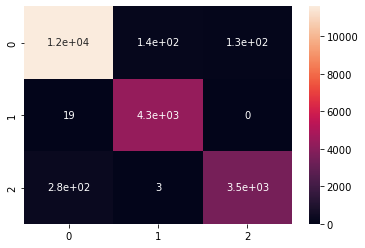

In [43]:
sns.heatmap(confusion_matrix(y_test,y_s),annot=True)